In [ ]:
%pip install gdown
%pip install sklearn
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install tensorflow
%pip install seaborn
%pip install xgboost

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('./forestfires.csv')
df['area'] = np.log1p(df['area'])
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


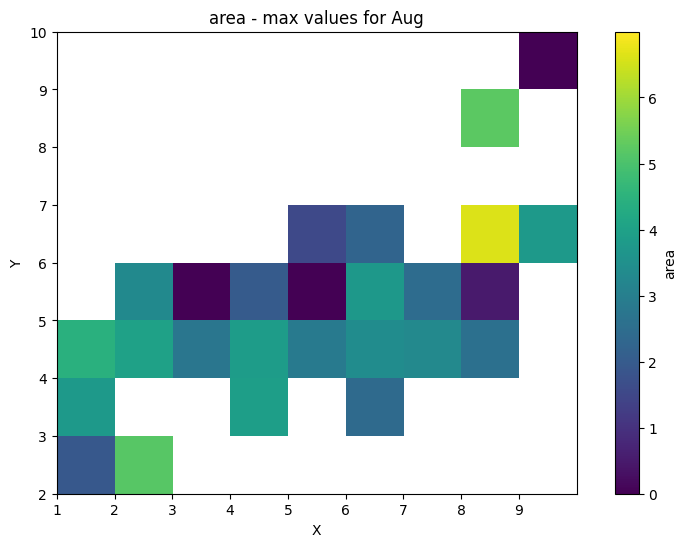

In [5]:
import matplotlib.pyplot as plt
def plot_grid(month, column_name, func='mean'):
    filtered_df = df[df['month'] == month]
    if func == 'mean':
        agg_values = filtered_df.groupby(['X', 'Y'])[column_name].mean().reset_index()
    elif func == 'min':
        agg_values = filtered_df.groupby(['X', 'Y'])[column_name].min().reset_index()
    elif func == 'max':
        agg_values = filtered_df.groupby(['X', 'Y'])[column_name].max().reset_index()
    else:
        raise ValueError("Invalid 'func' parameter. Choose from 'mean', 'min', or 'max'.")
    grid = np.full((8, 9), np.nan)
    for _, row in agg_values.iterrows():
        x = int(row['X']) - 1
        y = int(row['Y']) - 2
        grid[y, x] = row[column_name]
    plt.figure(figsize=(10, 6))
    plt.imshow(grid, cmap='viridis', origin='lower', extent=[1, 10, 2, 10], vmin=np.nanmin(df[column_name]), vmax=np.nanmax(df[column_name]))
    plt.colorbar(label=column_name)
    plt.title(f'{column_name} - {func} values for {month.capitalize()}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xticks(np.arange(1, 10))
    plt.yticks(np.arange(2, 11))
    plt.grid(visible=False)
    plt.show()
plot_grid('aug', 'area', 'max')

In [7]:
from sklearn.model_selection import train_test_split
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)
df.fillna(df.mean(), inplace=True)
y = df['area']
X = df.drop(columns=['area'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (413, 12)
X_test shape: (104, 12)
y_train shape: (413,)
y_test shape: (104,)


In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

ValueError: Unknown label type: (array([0.        , 0.0861777 , 0.15700375, 0.19062036, 0.21511138,
       0.28517894, 0.3074847 , 0.3435897 , 0.35767444, 0.41871033,
       0.43178242, 0.43825493, 0.47623418, 0.51879379, 0.53649337,
       0.54232429, 0.56531381, 0.57097955, 0.58221562, 0.64185389,
       0.66782937, 0.67294447, 0.69813472, 0.73716407, 0.74193734,
       0.75141609, 0.78390154, 0.81536481, 0.82855182, 0.85866162,
       0.86710049, 0.88789126, 0.90016135, 0.90421815, 0.94000726,
       0.9477894 , 0.95935022, 0.96698385, 0.97077892, 0.98954119,
       1.01160091, 1.01523068, 1.06471074, 1.07840958, 1.08180517,
       1.09861229, 1.10194008, 1.10856262, 1.12167756, 1.141033  ,
       1.1442228 , 1.1568812 , 1.16627094, 1.19088756, 1.20896035,
       1.23547147, 1.26129787, 1.2669476 , 1.2725656 , 1.29198368,
       1.30562646, 1.32175584, 1.327075  , 1.36863943, 1.39871688,
       1.403643  , 1.40854497, 1.43031125, 1.43270073, 1.45861502,
       1.4632554 , 1.46556754, 1.47017585, 1.5040774 , 1.50851199,
       1.53255687, 1.53471437, 1.54968791, 1.59533899, 1.59736533,
       1.59938758, 1.65822808, 1.68639895, 1.68824909, 1.71018782,
       1.72633166, 1.77155676, 1.78339122, 1.78507048, 1.82131827,
       1.82937633, 1.84530024, 1.85473427, 1.86252854, 1.87946505,
       1.89461685, 1.91692261, 1.92132467, 1.94161522, 1.95160817,
       1.96009478, 1.98787435, 1.99877364, 2.00552586, 2.02022218,
       2.02419307, 2.0255132 , 2.02946317, 2.05796251, 2.08193842,
       2.08442908, 2.1029139 , 2.10535292, 2.11625551, 2.11745961,
       2.12823171, 2.13771045, 2.16676537, 2.17475172, 2.19722458,
       2.19944433, 2.2104698 , 2.22354189, 2.23108909, 2.26072089,
       2.2700619 , 2.27315628, 2.28747146, 2.30058309, 2.32922702,
       2.34276688, 2.37676449, 2.39425228, 2.40514168, 2.40964417,
       2.4283363 , 2.46979301, 2.47905624, 2.48989419, 2.49815188,
       2.50061594, 2.50307395, 2.50470928, 2.51122396, 2.52812577,
       2.57261223, 2.57870053, 2.61300665, 2.6426224 , 2.64333389,
       2.72719902, 2.74534599, 2.75238601, 2.79361609, 2.80032548,
       2.83321334, 2.8524391 , 2.90142159, 2.93651291, 2.9601051 ,
       3.04594999, 3.13679771, 3.22803376, 3.22843004, 3.24220165,
       3.29583687, 3.30064013, 3.3116373 , 3.34462703, 3.37382618,
       3.38979934, 3.39249294, 3.41707073, 3.43977686, 3.44425687,
       3.48798651, 3.49225611, 3.6076694 , 3.63811234, 3.65609796,
       3.67579421, 3.69759139, 3.72665682, 3.78123072, 3.79143604,
       3.8649314 , 3.91939576, 3.96613233, 4.04375278, 4.17592455,
       4.26717679, 4.27332722, 4.28082413, 4.42783617, 4.4710672 ,
       4.49412689, 4.64813389, 4.66964621, 5.04908648, 5.16837951,
       5.22982437, 5.28563731, 5.30797062, 5.63310962, 6.61643995]),)